In [ ]:
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
!pip3 install deeplake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 kB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 k

In [ ]:
import deeplake
ds = deeplake.load('hub://activeloop/office-home-domain-adaptation')

-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/office-home-domain-adaptation



/

hub://activeloop/office-home-domain-adaptation loaded successfully.



In [ ]:
dataloader = ds.pytorch(num_workers = 0, batch_size= 128, shuffle = False)
train_loader=dataloader


/usr/local/lib/python3.9/dist-packages/deeplake/integrations/pytorch/common.py:91: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(


In [ ]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(size=[32,32]),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset = CIFAR10(root='data/', download=True, transform=transform_train)
test_dataset = CIFAR10(root='data/', train=False, transform=transform_test)

torch.manual_seed(43)
val_size = 5000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
batch_size=128

train_loader = DataLoader(dataset, batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size, num_workers=0, pin_memory=True)

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 106821866.17it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 13684556.46it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25944776.06it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21050308.03it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=128,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=128,
                                          shuffle=True,
                                          num_workers=1),
}

loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f99636e5bb0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f99636e5af0>}

In [ ]:
torch.manual_seed(43)
val_size = 5000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
# batch_size=125
len(train_ds), len(val_ds)
len(test_dataset)

NameError: ignored

In [ ]:
  train_loader=loaders['train']
  test_loader=loaders['test']


In [ ]:
def Generate_Permutation(seedv):
  print("Applying permutation to MNIST pixels")
  rng_permute = np.random.RandomState(seedv)
  idx_permute = rng_permute.permutation(784)
  transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                torchvision.transforms.Lambda(lambda x: x.view(-1)[idx_permute].view(1, 28, 28) )])

  TL = torch.utils.data.DataLoader(datasets.MNIST('data', train=True, download=True,
                    transform=transform),batch_size=128, shuffle=True)

  TeL = torch.utils.data.DataLoader(datasets.MNIST('data', train=False, download=True,
                    transform=transform),batch_size=128, shuffle=True)

  return TL,TeL

In [ ]:
Tasks_Train=[]
Tasks_Test=[]

Tasks_Train.append(train_loader)
Tasks_Test.append(test_loader)

TL,TeL=Generate_Permutation(1)
Tasks_Train.append(TL)
Tasks_Test.append(TeL)

TL,TeL=Generate_Permutation(4)
Tasks_Train.append(TL)
Tasks_Test.append(TeL)


TL,TeL=Generate_Permutation(3)
Tasks_Train.append(TL)
Tasks_Test.append(TeL)

TL,TeL=Generate_Permutation(2)
Tasks_Train.append(TL)
Tasks_Test.append(TeL)

Applying permutation to MNIST pixels
Applying permutation to MNIST pixels
Applying permutation to MNIST pixels
Applying permutation to MNIST pixels


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #if i remove (1,2,0) it showing single vector.


# get some random training images
# dataiter = iter(train_loader)
# images, labels = dataiter.next()

dataiter = iter(TL1)
data = next(dataiter)
images, labels=data

# show images
imshow(torchvision.utils.make_grid(images))

NameError: ignored

In [ ]:
for bt,lb in TL1:
  x=bt[0]
  lb=lb


import matplotlib.pyplot as plt
plt.imshow(datasets.MNIST('data', train=True, download=True,
                   transform=transform).data[0], cmap='gray')
plt.title('%i' % datasets.MNIST('data', train=True, download=True,
                   transform=transform).targets[0])
plt.show()

NameError: ignored

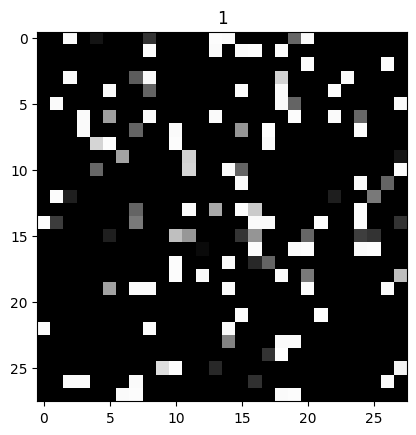

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x.data[0], cmap='gray')
plt.title('%i' % lb.data[0])
plt.show()

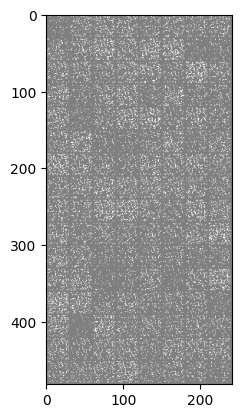

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #if i remove (1,2,0) it showing single vector.


# get some random training images


dataiter = iter(TL1)
data = next(dataiter)
images, labels=data

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
input_size = 1*28*28
output_size = 10

In [ ]:
"""VGG(
  (convs): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (18): ReLU()
    (19): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (20): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (21): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (22): ReLU()
    (23): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (26): ReLU()
    (27): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (28): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (30): ReLU()
    (31): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (32): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (33): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (34): ReLU()
    (35): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (36): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (37): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (38): ReLU()
    (39): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (40): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (41): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (42): ReLU()
    (43): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (44): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (45): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (46): ReLU()
    (47): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (48): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (49): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (50): ReLU()
    (51): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fcs): Sequential(
    (0): Linear(in_features=512, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)
"""



# VGG_NPF
class VGGNEW(nn.Module):
    def __init__(self):
        super().__init__()
        self.C11= nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.B11=nn.BatchNorm2d(64)


        self.C12=nn.Conv2d(64, 64, kernel_size=(3, 3),padding=1)
        self.B12=nn.BatchNorm2d(64)
        self.M12=nn.AvgPool2d(2,2)


        self.C21=nn.Conv2d(64, 128,kernel_size=(3, 3), padding=(1, 1))
        self.B21=nn.BatchNorm2d(128)

        self.C22=nn.Conv2d(128, 128, kernel_size=(3, 3), padding=(1, 1))
        self.B22=nn.BatchNorm2d(128)
        self.M22=nn.AvgPool2d(2,2,padding=1)

        self.C31=nn.Conv2d(128, 256, kernel_size=(3, 3), padding=(1, 1))
        self.B31=nn.BatchNorm2d(256)


        self.C32=nn.Conv2d(256, 256, kernel_size=(3, 3),  padding=(1, 1))
        self.B32=nn.BatchNorm2d(256)

        self.C33=nn.Conv2d(256, 256, kernel_size=(3, 3),  padding=(1, 1))
        self.B33=nn.BatchNorm2d(256)
        self.M33=nn.AvgPool2d(2,2,padding=1)

        self.C41=nn.Conv2d(256, 512, kernel_size=(3, 3),  padding=(1, 1))
        self.B41=nn.BatchNorm2d(512)

        self.C42=nn.Conv2d(512, 512, kernel_size=(3, 3),  padding=(1, 1))
        self.B42=nn.BatchNorm2d(512)


        self.C43=nn.Conv2d(512, 512, kernel_size=(3, 3),  padding=(1, 1))
        self.B43=nn.BatchNorm2d(512)
        self.M43=nn.AvgPool2d(2,2,padding=1)

        self.C51=nn.Conv2d(512, 512, kernel_size=(3, 3), padding=(1, 1))
        self.B51=nn.BatchNorm2d(512)

        self.C52=nn.Conv2d(512, 512, kernel_size=(3, 3),  padding=(1, 1))
        self.B52=nn.BatchNorm2d(512)

        self.C53=nn.Conv2d(512, 512, kernel_size=(3, 3), padding=(1, 1))
        self.B53=nn.BatchNorm2d(512)
        self.M53=nn.AvgPool2d(2,2,padding=1)


    def forward(self, xb):
        #out = xb.view(xb.size(0), -1)
        self.Gate_NPF=[]
        SIGMOID=torch.nn.Sigmoid()
        beta=10

        out = self.C11(xb)
        out=self.B11(out)
        self.Gate_NPF.append(SIGMOID(beta*out))


        out = self.C12(out)
        out=self.B12(out)
        self.Gate_NPF.append(SIGMOID(beta*out))
        out = self.M12(out)

        out = self.C21(out)
        out=self.B21(out)
        self.Gate_NPF.append(SIGMOID(beta*out))


        out = self.C22(out)
        out=self.B22(out)
        self.Gate_NPF.append(SIGMOID(beta*out))
        out = self.M22(out)

        out = self.C31(out)
        out=self.B31(out)
        self.Gate_NPF.append(SIGMOID(beta*out))


        out = self.C32(out)
        out=self.B32(out)
        self.Gate_NPF.append(SIGMOID(beta*out))


        out = self.C33(out)
        out=self.B33(out)
        self.Gate_NPF.append(SIGMOID(beta*out))
        out = self.M33(out)

        out = self.C41(out)
        out=self.B41(out)
        self.Gate_NPF.append(SIGMOID(beta*out))


        out = self.C42(out)
        out=self.B42(out)
        self.Gate_NPF.append(SIGMOID(beta*out))


        out = self.C43(out)
        out=self.B43(out)
        self.Gate_NPF.append(SIGMOID(beta*out))
        out = self.M43(out)

        out = self.C51(out)
        out=self.B51(out)
        self.Gate_NPF.append(SIGMOID(beta*out))


        out = self.C52(out)
        out=self.B52(out)
        self.Gate_NPF.append(SIGMOID(beta*out))


        out = self.C53(out)
        out=self.B53(out)
        self.Gate_NPF.append(SIGMOID(beta*out))
        out = self.M53(out)

    def Return_NPF_Gates(self):
      return self.Gate_NPF

In [ ]:
class VGGWeight(nn.Module):
    def __init__(self):
        super().__init__()
        self.C11= nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.B11=nn.BatchNorm2d(64)


        self.C12=nn.Conv2d(64, 64, kernel_size=(3, 3),padding=1)
        self.B12=nn.BatchNorm2d(64)
        self.M12=nn.MaxPool2d(2,2)


        self.C21=nn.Conv2d(64, 128,kernel_size=(3, 3), padding=(1, 1))
        self.B21=nn.BatchNorm2d(128)


        self.C22=nn.Conv2d(128, 128, kernel_size=(3, 3), padding=(1, 1))
        self.B22=nn.BatchNorm2d(128)
        self.M22=nn.MaxPool2d(2,2,padding=1)

        self.C31=nn.Conv2d(128, 256, kernel_size=(3, 3), padding=(1, 1))
        self.B31=nn.BatchNorm2d(256)


        self.C32=nn.Conv2d(256, 256, kernel_size=(3, 3),  padding=(1, 1))
        self.B32=nn.BatchNorm2d(256)


        self.C33=nn.Conv2d(256, 256, kernel_size=(3, 3),  padding=(1, 1))
        self.B33=nn.BatchNorm2d(256)
        self.M33=nn.MaxPool2d(2,2,padding=1)

        self.C41=nn.Conv2d(256, 512, kernel_size=(3, 3),  padding=(1, 1))
        self.B41=nn.BatchNorm2d(512)


        self.C42=nn.Conv2d(512, 512, kernel_size=(3, 3),  padding=(1, 1))
        self.B42=nn.BatchNorm2d(512)


        self.C43=nn.Conv2d(512, 512, kernel_size=(3, 3),  padding=(1, 1))
        self.B43=nn.BatchNorm2d(512)
        self.M43=nn.MaxPool2d(2,2,padding=1)

        self.C51=nn.Conv2d(512, 512, kernel_size=(3, 3), padding=(1, 1))
        self.B51=nn.BatchNorm2d(512)

        self.C52=nn.Conv2d(512, 512, kernel_size=(3, 3),  padding=(1, 1))
        self.B52=nn.BatchNorm2d(512)

        self.C53=nn.Conv2d(512, 512, kernel_size=(3, 3), padding=(1, 1))
        self.B53=nn.BatchNorm2d(512)
        self.M53=nn.MaxPool2d(2,2,padding=1)

        self.FF=nn.Flatten()
        self.L1=nn.Linear(in_features=2048, out_features=4096, bias=True)
        self.D1=nn.Dropout(p=0.5, inplace=False)
        self.L2=nn.Linear(in_features=4096, out_features=4096, bias=True)
        self.D2=nn.Dropout(p=0.5, inplace=False)
        self.L3=nn.Linear(in_features=4096, out_features=10, bias=True)


    def forward(self, xb,G):
       # xb = xb.view(xb.size(0), -1)
        SIGMOID=torch.nn.Sigmoid()
        beta=10
        i=0
        out = self.C11(xb)
        out=self.B11(out)
        out = out*G[i].detach()
        i=i+1



        out = self.C12(out)
        out=self.B12(out)
        out = out*G[i].detach()
        i=i+1
        out = self.M12(out)

        out = self.C21(out)
        out=self.B21(out)
        out = out*G[i].detach()
        i=i+1



        out = self.C22(out)
        out=self.B22(out)
        out = out*G[i].detach()
        i=i+1
        out = self.M22(out)

        out = self.C31(out)
        out=self.B31(out)
        out = out*G[i].detach()
        i=i+1

        out = self.C32(out)
        out=self.B32(out)
        out = out*G[i].detach()
        i=i+1

        out = self.C33(out)
        out=self.B33(out)
        out = out*G[i].detach()
        i=i+1
        out = self.M33(out)

        out = self.C41(out)
        out=self.B41(out)
        out = out*G[i].detach()
        i=i+1


        out = self.C42(out)
        out=self.B42(out)
        out = out*G[i].detach()
        i=i+1


        out = self.C43(out)
        out=self.B43(out)
        out = out*G[i].detach()
        i=i+1
        out = self.M43(out)

        out = self.C51(out)
        out=self.B51(out)
        out = out*G[i].detach()
        i=i+1

        out = self.C52(out)
        out=self.B52(out)
        out = out*G[i].detach()
        i=i+1

        out = self.C53(out)
        out=self.B53(out)
        out = out*G[i].detach()
        i=i+1
        out = self.M53(out)

        out=self.FF(out)
        out=self.L1(out)
        out=self.D1(out)
        out=self.L2(out)
        out=self.D2(out)
        out = self.L3(out)
        return out

In [ ]:
Model_NPF=VGGNEW()

if train_on_gpu:
  Model_NPF.cuda()

Model_NPV=VGGWeight()

if train_on_gpu:
  Model_NPV.cuda()



# for name, param in Model_NPF.named_parameters():
#   print(name)
# print(Model_NPV.C11.weight.lr)

In [ ]:
criterion = nn.CrossEntropyLoss()
def fit(epochs, lr, Model_NPF,Model_NPV, train_loader,optimizer, opt_func=torch.optim.SGD):
    history = []
    # optimizer = opt_func(Model_NPV.parameters(),lr,momentum=0.9)
    for epoch in range(epochs):
        for batch_images,labels in train_loader:
            if train_on_gpu:
              batch_images, labels = batch_images.cuda(), labels.cuda()
              All_ones=torch.ones(batch_images.shape).cuda()
            Model_NPF.forward(batch_images)

            output=Model_NPV.forward(All_ones,Model_NPF.Return_NPF_Gates())
            loss = criterion(output,labels)
            loss.backward()
            optimizer.step()

            optimizer.zero_grad()

        if (epoch+1) % 1 == 0:
          print (f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

EWC Starts

In [ ]:
fisher_dict = {}
optpar_dict = {}
ewc_lambda = 0.4

In [ ]:
def on_task_update(task_id, x_mem, t_mem):

  model.train()
  optimizer.zero_grad()

  # accumulating gradients
  for start in range(0, len(t_mem)-1, 256):
      end = start + 256
      x, y = torch.from_numpy(x_mem[start:end]), torch.from_numpy(t_mem[start:end]).long()
      x, y = x.to(device), y.to(device)
      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()

  fisher_dict[task_id] = {}
  optpar_dict[task_id] = {}

  # gradients accumulated can be used to calculate fisher
  for name, param in model.named_parameters():

    optpar_dict[task_id][name] = param.data.clone()
    fisher_dict[task_id][name] = param.grad.data.clone().pow(2)

In [ ]:
criterion = nn.CrossEntropyLoss()
def fit(epochs, lr, Model_NPF,Model_NPV, train_loader,optimizer, opt_func=torch.optim.SGD):
    history = []
    # optimizer = opt_func(Model_NPV.parameters(),lr,momentum=0.9)
    for epoch in range(epochs):
        for batch_images,labels in train_loader:
            if train_on_gpu:
              batch_images, labels = batch_images.cuda(), labels.cuda()
              All_ones=torch.ones(batch_images.shape).cuda()
            Model_NPF.forward(batch_images)

            output=Model_NPV.forward(All_ones,Model_NPF.Return_NPF_Gates())
            loss = criterion(output,labels)
            for task in range(task_id):
              for name, param in model.named_parameters():
                fisher = fisher_dict[task][name]
                optpar = optpar_dict[task][name]
                loss += (fisher * (optpar - param).pow(2)).sum() * ewc_lambda



            loss.backward()
            optimizer.step()

            optimizer.zero_grad()

        if (epoch+1) % 1 == 0:
          print (f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [ ]:
"""EWC"""


def train_ewc(model, device, task_id, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, 256):
      end = start + 256
      x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
      x, y = x.to(device), y.to(device)

      optimizer.zero_grad()
      batch_images, labels = x.cuda(), y.cuda()
      All_ones=torch.ones(256).cuda()
      Model_NPF.forward(batch_images)
      output=Model_NPV.forward(All_ones,Model_NPF.Return_NPF_Gates())
      loss = F.cross_entropy(output, y)

      for task in range(task_id):
        for name, param in model.named_parameters():
          fisher = fisher_dict[task][name]
          optpar = optpar_dict[task][name]
          loss += (fisher * (optpar - param).pow(2)).sum() * ewc_lambda

      loss.backward()
      optimizer.step()

    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

In [ ]:
ewc_accs = []
for id, task in enumerate(tasks):
  avg_acc = 0
  print("Training on task-",id)
  (x_train, t_train), _ = task
  for epoch in range(1, 3):
    train_ewc(model, device, id, x_train, t_train, optimizer, epoch)
  on_task_update(id, x_train, t_train)
  for id_test, task in enumerate(tasks):
    print("Testing on task-",id_test)
    _, (x_test, t_test) = task
    acc = test(model, device, x_test, t_test)
    avg_acc = avg_acc + acc
  print("Avg acc: ", avg_acc / 3)
  ewc_accs.append(avg_acc / 3)


for i in range (5):
  print("Training for task ",i)
  fit(5,0.001,Model_NPF,Model_NPV,Tasks_Train[i],optimizer[i])


EWC

In [ ]:
optimizer =[]

opt0 = torch.optim.SGD(Model_NPV.parameters(),0.001,momentum=0.9)
optimizer.append(opt0)


opt1=torch.optim.SGD([
            {'params': Model_NPV.C11.weight,'lr': 1},
            {'params': Model_NPV.C11.bias, 'lr': 1},
            {'params': Model_NPV.B11.weight, 'lr': 1},
            {'params': Model_NPV.B11.bias, 'lr': 1},
            {'params': Model_NPV.C12.weight,'lr': 1},
            {'params': Model_NPV.C12.bias, 'lr': 1},
            {'params': Model_NPV.B12.weight, 'lr': 1},
            {'params': Model_NPV.B12.bias, 'lr': 1},
            {'params': Model_NPV.C21.weight,'lr': 0.9},
            {'params': Model_NPV.C21.bias, 'lr': 0.9},
            {'params': Model_NPV.B21.weight, 'lr': 0.9},
            {'params': Model_NPV.B21.bias, 'lr': 0.9},
            {'params': Model_NPV.C22.weight,'lr': 0.9},
            {'params': Model_NPV.C22.bias, 'lr': 0.9},
            {'params': Model_NPV.B22.weight, 'lr': 0.9},
            {'params': Model_NPV.B22.bias, 'lr': 0.9},
            {'params': Model_NPV.C31.weight,'lr': 0.001},
            {'params': Model_NPV.C31.bias, 'lr': 0.001},
            {'params': Model_NPV.B31.weight, 'lr': 0.001},
            {'params': Model_NPV.B31.bias, 'lr': 0.001},
            {'params': Model_NPV.C32.weight,'lr': 0.001},
            {'params': Model_NPV.C32.bias, 'lr': 0.001},
            {'params': Model_NPV.B32.weight, 'lr': 0.001},
            {'params': Model_NPV.B32.bias, 'lr': 0.001},
            {'params': Model_NPV.C33.weight,'lr': 0.001},
            {'params': Model_NPV.C33.bias, 'lr': 0.001},
            {'params': Model_NPV.B33.weight, 'lr': 0.001},
            {'params': Model_NPV.B33.bias, 'lr': 0.001},
            {'params': Model_NPV.C41.weight,'lr': 0.001},
            {'params': Model_NPV.C41.bias, 'lr': 0.001},
            {'params': Model_NPV.B41.weight, 'lr': 0.001},
            {'params': Model_NPV.B41.bias, 'lr': 0.001},
            {'params': Model_NPV.C42.weight,'lr': 0.001},
            {'params': Model_NPV.C42.bias, 'lr': 0.001},
            {'params': Model_NPV.B42.weight, 'lr': 0.001},
            {'params': Model_NPV.B42.bias, 'lr': 0.001},
            {'params': Model_NPV.C43.weight,'lr': 0.001},
            {'params': Model_NPV.C43.bias, 'lr': 0.001},
            {'params': Model_NPV.B43.weight, 'lr': 0.001},
            {'params': Model_NPV.B43.bias, 'lr': 0.001},
            {'params': Model_NPV.C51.weight,'lr': 0.001},
            {'params': Model_NPV.C51.bias, 'lr': 0.001},
            {'params': Model_NPV.B51.weight, 'lr': 0.001},
            {'params': Model_NPV.B51.bias, 'lr': 0.001},
            {'params': Model_NPV.C52.weight,'lr': 0.001},
            {'params': Model_NPV.C52.bias, 'lr': 0.001},
            {'params': Model_NPV.B52.weight, 'lr': 0.001},
            {'params': Model_NPV.B52.bias, 'lr': 0.001},
            {'params': Model_NPV.C53.weight,'lr': 0.001},
            {'params': Model_NPV.C53.bias, 'lr': 0.001},
            {'params': Model_NPV.B53.weight, 'lr': 0.001},
            {'params': Model_NPV.B53.bias, 'lr': 0.001},

        ], lr=0.001,momentum=0.9 )
optimizer.append(opt1)




opt2=torch.optim.SGD([
            {'params': Model_NPV.C11.weight,'lr': 1},
            {'params': Model_NPV.C11.bias, 'lr': 1},
            {'params': Model_NPV.B11.weight, 'lr': 1},
            {'params': Model_NPV.B11.bias, 'lr': 1},
            {'params': Model_NPV.C12.weight,'lr': 1},
            {'params': Model_NPV.C12.bias, 'lr': 1},
            {'params': Model_NPV.B12.weight, 'lr': 1},
            {'params': Model_NPV.B12.bias, 'lr': 1},
            {'params': Model_NPV.C21.weight,'lr': 1},
            {'params': Model_NPV.C21.bias, 'lr': 1},
            {'params': Model_NPV.B21.weight, 'lr': 1},
            {'params': Model_NPV.B21.bias, 'lr': 1},
            {'params': Model_NPV.C22.weight,'lr': 1},
            {'params': Model_NPV.C22.bias, 'lr': 1},
            {'params': Model_NPV.B22.weight, 'lr': 1},
            {'params': Model_NPV.B22.bias, 'lr': 1},
            {'params': Model_NPV.C31.weight,'lr': 1},
            {'params': Model_NPV.C31.bias, 'lr': 1},
            {'params': Model_NPV.B31.weight, 'lr': 1},
            {'params': Model_NPV.B31.bias, 'lr': 0.1},
            {'params': Model_NPV.C32.weight,'lr': 0.1},
            {'params': Model_NPV.C32.bias, 'lr': 0.1},
            {'params': Model_NPV.B32.weight, 'lr': 0.1},
            {'params': Model_NPV.B32.bias, 'lr': 0.1},
            {'params': Model_NPV.C33.weight,'lr': 0.1},
            {'params': Model_NPV.C33.bias, 'lr': 0.1},
            {'params': Model_NPV.B33.weight, 'lr': 0.1},
            {'params': Model_NPV.B33.bias, 'lr': 0.1},
            {'params': Model_NPV.C41.weight,'lr': 0.01},
            {'params': Model_NPV.C41.bias, 'lr': 0.01},
            {'params': Model_NPV.B41.weight, 'lr': 0.01},
            {'params': Model_NPV.B41.bias, 'lr': 0.01},
            {'params': Model_NPV.C42.weight,'lr': 0.01},
            {'params': Model_NPV.C42.bias, 'lr': 0.01},
            {'params': Model_NPV.B42.weight, 'lr': 0.01},
            {'params': Model_NPV.B42.bias, 'lr': 0.01},
            {'params': Model_NPV.C43.weight,'lr': 0.01},
            {'params': Model_NPV.C43.bias, 'lr': 0.01},
            {'params': Model_NPV.B43.weight, 'lr': 0.01},
            {'params': Model_NPV.B43.bias, 'lr': 0.01},
            {'params': Model_NPV.C51.weight,'lr': 0.001},
            {'params': Model_NPV.C51.bias, 'lr': 0.001},
            {'params': Model_NPV.B51.weight, 'lr': 0.001},
            {'params': Model_NPV.B51.bias, 'lr': 0.001},
            {'params': Model_NPV.C52.weight,'lr': 0.001},
            {'params': Model_NPV.C52.bias, 'lr': 0.001},
            {'params': Model_NPV.B52.weight, 'lr': 0.001},
            {'params': Model_NPV.B52.bias, 'lr': 0.001},
            {'params': Model_NPV.C53.weight,'lr': 0.001},
            {'params': Model_NPV.C53.bias, 'lr': 0.001},
            {'params': Model_NPV.B53.weight, 'lr': 0.001},
            {'params': Model_NPV.B53.bias, 'lr': 0.001},

        ], lr=0.001,momentum=0.9 )
optimizer.append(opt2)


opt3=opt2=torch.optim.SGD([
            {'params': Model_NPV.C11.weight,'lr': 1},
            {'params': Model_NPV.C11.bias, 'lr': 1},
            {'params': Model_NPV.B11.weight, 'lr': 1},
            {'params': Model_NPV.B11.bias, 'lr': 1},
            {'params': Model_NPV.C12.weight,'lr': 1},
            {'params': Model_NPV.C12.bias, 'lr': 1},
            {'params': Model_NPV.B12.weight, 'lr': 1},
            {'params': Model_NPV.B12.bias, 'lr': 1},
            {'params': Model_NPV.C21.weight,'lr': 1},
            {'params': Model_NPV.C21.bias, 'lr': 1},
            {'params': Model_NPV.B21.weight, 'lr': 1},
            {'params': Model_NPV.B21.bias, 'lr': 1},
            {'params': Model_NPV.C22.weight,'lr': 1},
            {'params': Model_NPV.C22.bias, 'lr': 1},
            {'params': Model_NPV.B22.weight, 'lr': 1},
            {'params': Model_NPV.B22.bias, 'lr': 1},
            {'params': Model_NPV.C31.weight,'lr': 1},
            {'params': Model_NPV.C31.bias, 'lr': 1},
            {'params': Model_NPV.B31.weight, 'lr': 1},
            {'params': Model_NPV.B31.bias, 'lr': 1},
            {'params': Model_NPV.C32.weight,'lr': 1},
            {'params': Model_NPV.C32.bias, 'lr': 0.1},
            {'params': Model_NPV.B32.weight, 'lr': 0.1},
            {'params': Model_NPV.B32.bias, 'lr': 0.1},
            {'params': Model_NPV.C33.weight,'lr': 0.1},
            {'params': Model_NPV.C33.bias, 'lr': 0.1},
            {'params': Model_NPV.B33.weight, 'lr': 0.1},
            {'params': Model_NPV.B33.bias, 'lr': 0.1},
            {'params': Model_NPV.C41.weight,'lr': 0.01},
            {'params': Model_NPV.C41.bias, 'lr': 0.01},
            {'params': Model_NPV.B41.weight, 'lr': 0.01},
            {'params': Model_NPV.B41.bias, 'lr': 0.01},
            {'params': Model_NPV.C42.weight,'lr': 0.01},
            {'params': Model_NPV.C42.bias, 'lr': 0.01},
            {'params': Model_NPV.B42.weight, 'lr': 0.01},
            {'params': Model_NPV.B42.bias, 'lr': 0.01},
            {'params': Model_NPV.C43.weight,'lr': 0.01},
            {'params': Model_NPV.C43.bias, 'lr': 0.01},
            {'params': Model_NPV.B43.weight, 'lr': 0.01},
            {'params': Model_NPV.B43.bias, 'lr': 0.01},
            {'params': Model_NPV.C51.weight,'lr': 0.001},
            {'params': Model_NPV.C51.bias, 'lr': 0.001},
            {'params': Model_NPV.B51.weight, 'lr': 0.001},
            {'params': Model_NPV.B51.bias, 'lr': 0.001},
            {'params': Model_NPV.C52.weight,'lr': 0.001},
            {'params': Model_NPV.C52.bias, 'lr': 0.001},
            {'params': Model_NPV.B52.weight, 'lr': 0.001},
            {'params': Model_NPV.B52.bias, 'lr': 0.001},
            {'params': Model_NPV.C53.weight,'lr': 0.001},
            {'params': Model_NPV.C53.bias, 'lr': 0.001},
            {'params': Model_NPV.B53.weight, 'lr': 0.001},
            {'params': Model_NPV.B53.bias, 'lr': 0.001},

        ], lr=0.001,momentum=0.9 )
optimizer.append(opt3)


opt4=torch.optim.SGD([
            {'params': Model_NPV.C11.weight,'lr': 0.99},
            {'params': Model_NPV.C11.bias, 'lr': 0.99},
            {'params': Model_NPV.B11.weight, 'lr': 0.99},
            {'params': Model_NPV.B11.bias, 'lr': 0.99},
            {'params': Model_NPV.C12.weight,'lr': 0.99},
            {'params': Model_NPV.C12.bias, 'lr': 0.99},
            {'params': Model_NPV.B12.weight, 'lr': 0.99},
            {'params': Model_NPV.B12.bias, 'lr': 0.99},
            {'params': Model_NPV.C21.weight,'lr': 0.9},
            {'params': Model_NPV.C21.bias, 'lr': 0.9},
            {'params': Model_NPV.B21.weight, 'lr': 0.9},
            {'params': Model_NPV.B21.bias, 'lr': 0.9},
            {'params': Model_NPV.C22.weight,'lr': 0.9},
            {'params': Model_NPV.C22.bias, 'lr': 0.9},
            {'params': Model_NPV.B22.weight, 'lr': 0.9},
            {'params': Model_NPV.B22.bias, 'lr': 0.9},
            {'params': Model_NPV.C31.weight,'lr': 0.5},
            {'params': Model_NPV.C31.bias, 'lr': 0.5},
            {'params': Model_NPV.B31.weight, 'lr': 0.5},
            {'params': Model_NPV.B31.bias, 'lr': 0.5},
            {'params': Model_NPV.C32.weight,'lr': 0.5},
            {'params': Model_NPV.C32.bias, 'lr': 0.5},
            {'params': Model_NPV.B32.weight, 'lr': 0.5},
            {'params': Model_NPV.B32.bias, 'lr': 0.5},
            {'params': Model_NPV.C33.weight,'lr': 0.5},
            {'params': Model_NPV.C33.bias, 'lr': 0.5},
            {'params': Model_NPV.B33.weight, 'lr': 0.5},
            {'params': Model_NPV.B33.bias, 'lr': 0.5},
            {'params': Model_NPV.C41.weight,'lr': 0.05},
            {'params': Model_NPV.C41.bias, 'lr': 0.05},
            {'params': Model_NPV.B41.weight, 'lr': 0.05},
            {'params': Model_NPV.B41.bias, 'lr': 0.05},
            {'params': Model_NPV.C42.weight,'lr': 0.05},
            {'params': Model_NPV.C42.bias, 'lr': 0.05},
            {'params': Model_NPV.B42.weight, 'lr': 0.05},
            {'params': Model_NPV.B42.bias, 'lr': 0.05},
            {'params': Model_NPV.C43.weight,'lr': 0.05},
            {'params': Model_NPV.C43.bias, 'lr': 0.05},
            {'params': Model_NPV.B43.weight, 'lr': 0.05},
            {'params': Model_NPV.B43.bias, 'lr': 0.05},
            {'params': Model_NPV.C51.weight,'lr': 0.001},
            {'params': Model_NPV.C51.bias, 'lr': 0.001},
            {'params': Model_NPV.B51.weight, 'lr': 0.001},
            {'params': Model_NPV.B51.bias, 'lr': 0.001},
            {'params': Model_NPV.C52.weight,'lr': 0.001},
            {'params': Model_NPV.C52.bias, 'lr': 0.001},
            {'params': Model_NPV.B52.weight, 'lr': 0.001},
            {'params': Model_NPV.B52.bias, 'lr': 0.001},
            {'params': Model_NPV.C53.weight,'lr': 0.001},
            {'params': Model_NPV.C53.bias, 'lr': 0.001},
            {'params': Model_NPV.B53.weight, 'lr': 0.001},
            {'params': Model_NPV.B53.bias, 'lr': 0.001},

        ], lr=0.001,momentum=0.9 )

optimizer.append(opt4)

for i in range (5):
  print("Training for task ",i)
  fit(5,0.001,Model_NPF,Model_NPV,Tasks_Train[i],optimizer[i])


Training for task  0
Epoch [1/5], Loss: 0.0808
Epoch [2/5], Loss: 0.0205
Epoch [3/5], Loss: 0.0070
Epoch [4/5], Loss: 0.0019
Epoch [5/5], Loss: 0.0009
Training for task  1
Epoch [1/5], Loss: 0.1596
Epoch [2/5], Loss: 0.0423
Epoch [3/5], Loss: 0.0112
Epoch [4/5], Loss: 0.0048
Epoch [5/5], Loss: 0.0041
Training for task  2
Epoch [1/5], Loss: 0.1555
Epoch [2/5], Loss: 0.0363
Epoch [3/5], Loss: 0.0033
Epoch [4/5], Loss: 0.0031
Epoch [5/5], Loss: 0.0024
Training for task  3
Epoch [1/5], Loss: 0.1806
Epoch [2/5], Loss: 0.0655
Epoch [3/5], Loss: 0.0156
Epoch [4/5], Loss: 0.0048
Epoch [5/5], Loss: 0.0044
Training for task  4
Epoch [1/5], Loss: 0.0957
Epoch [2/5], Loss: 0.0985
Epoch [3/5], Loss: 0.0185
Epoch [4/5], Loss: 0.0172
Epoch [5/5], Loss: 0.0047


In [ ]:
#Testing the model
def Test(test_loader):
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    if train_on_gpu:
      images, labels = images.cuda(), labels.cuda()
      All_ones=torch.ones(images.shape).cuda()
    Model_NPF.forward(images)
    output=Model_NPV.forward(images,Model_NPF.Return_NPF_Gates())
    # max returns (value ,index)
    _, predicted = torch.max(output.data, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images: {acc} %')

In [ ]:



optimizer =[]

opt0 = torch.optim.SGD(Model_NPV.parameters(),0.001,momentum=0.9)
# optimizer.append(opt0)
for i in range (3):
  print("Training for task ",i)
  fit(32,0.001,Model_NPF,Model_NPV,Tasks_Train[i],opt0)
  if i==0:
    Model_NPV.C11.weight.requires_grad =False
    Model_NPV.C11.bias.requires_grad=False
    Model_NPV.B11.weight.requires_grad=False
    Model_NPV.B11.bias.requires_grad=False
    Model_NPV.C12.weight.requires_grad=False
    Model_NPV.C12.bias.requires_grad=False
    Model_NPV.B12.weight.requires_grad=False
    Model_NPV.B12.bias.requires_grad=False
    Model_NPV.C21.weight.requires_grad =False
    Model_NPV.C21.bias.requires_grad=False
    Model_NPV.B21.weight.requires_grad=False
    Model_NPV.B21.bias.requires_grad=False
    Model_NPV.C22.weight.requires_grad=False
    Model_NPV.C22.bias.requires_grad=False
    Model_NPV.B22.weight.requires_grad=False
    Model_NPV.B22.bias.requires_grad=False
    # opt0 = torch.optim.SGD(Model_NPV.parameters(),0.002,momentum=0.9)
  if i==1:

    Model_NPV.C31.weight.requires_grad=False
    Model_NPV.C31.bias.requires_grad=False
    Model_NPV.B31.weight.requires_grad=False
    Model_NPV.B31.bias.requires_grad=False
    Model_NPV.C32.weight.requires_grad=False
    Model_NPV.C32.bias.requires_grad=False
    Model_NPV.B32.weight.requires_grad=False
    Model_NPV.B32.bias.requires_grad=False
    Model_NPV.C41.weight.requires_grad=False
    Model_NPV.C41.bias.requires_grad=False
    Model_NPV.B41.weight.requires_grad=False
    Model_NPV.B41.bias.requires_grad=False
    Model_NPV.C42.weight.requires_grad=False
    Model_NPV.C42.bias.requires_grad=False
    Model_NPV.B42.weight.requires_grad=False
    Model_NPV.B42.bias.requires_grad=False
    Model_NPV.C43.weight.requires_grad=False
    Model_NPV.C43.bias.requires_grad=False
    Model_NPV.B43.weight.requires_grad=False
    Model_NPV.B43.bias.requires_grad=False
    Model_NPV.C43.weight.requires_grad=False
    Model_NPV.C43.bias.requires_grad=False
    Model_NPV.B43.weight.requires_grad=False
    Model_NPV.B43.bias.requires_grad=False
    # opt0 = torch.optim.SGD(Model_NPV.parameters(),0.003,momentum=0.9)



  for j in range(i+1):
    Test(Tasks_Test[j])




Training for task  0
Epoch [1/32], Loss: 0.0443
Epoch [2/32], Loss: 0.0590
Epoch [3/32], Loss: 0.0030
Epoch [4/32], Loss: 0.0020
Epoch [5/32], Loss: 0.0014
Epoch [6/32], Loss: 0.0013
Epoch [7/32], Loss: 0.0009
Epoch [8/32], Loss: 0.0004
Epoch [9/32], Loss: 0.0003
Epoch [10/32], Loss: 0.0009
Epoch [11/32], Loss: 0.0002
Epoch [12/32], Loss: 0.0004
Epoch [13/32], Loss: 0.0002
Epoch [14/32], Loss: 0.0002
Epoch [15/32], Loss: 0.0002
Epoch [16/32], Loss: 0.0004
Epoch [17/32], Loss: 0.0004
Epoch [18/32], Loss: 0.0002
Epoch [19/32], Loss: 0.0002
Epoch [20/32], Loss: 0.0001
Epoch [21/32], Loss: 0.0003
Epoch [22/32], Loss: 0.0002
Epoch [23/32], Loss: 0.0002
Epoch [24/32], Loss: 0.0001
Epoch [25/32], Loss: 0.0001
Epoch [26/32], Loss: 0.0001
Epoch [27/32], Loss: 0.0000
Epoch [28/32], Loss: 0.0001
Epoch [29/32], Loss: 0.0001
Epoch [30/32], Loss: 0.0000
Epoch [31/32], Loss: 0.0001
Epoch [32/32], Loss: 0.0001
Accuracy of the network on the 10000 test images: 87.04 %
Training for task  1
Epoch [1/32],

In [ ]:
for i in range(3):
  print("Task ",i)
  print(optimizer[i])
  # for param_group in optimizer[i].param_groups:
    # print(param_group)

Task  0


AttributeError: ignored

In [ ]:
print(Model_NPV.C11)

Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
#Testing the model
def Test(test_loader):
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    if train_on_gpu:
      images, labels = images.cuda(), labels.cuda()
      All_ones=torch.ones(images.shape).cuda()
    Model_NPF.forward(images)
    output=Model_NPV.forward(images,Model_NPF.Return_NPF_Gates())
    # max returns (value ,index)
    _, predicted = torch.max(output.data, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images: {acc} %')

In [ ]:
for i in range (3):
  print("Accuracy For Task ",i)
  Test(Tasks_Test[i])

Accuracy For Task  0
Accuracy of the network on the 10000 test images: 59.93 %
Accuracy For Task  1
Accuracy of the network on the 10000 test images: 69.1 %
Accuracy For Task  2
Accuracy of the network on the 10000 test images: 83.38 %
